In [11]:
!git clone https://github.com/ucfilho/ANN
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sp
%matplotlib inline

Cloning into 'ANN'...
remote: Counting objects: 43, done.
remote: Compressing objects: 100% (40/40), done.
remote: Total 43 (delta 11), reused 3 (delta 0), pack-reused 0
Unpacking objects: 100% (43/43), done.


In [2]:
%cd ANN
DAT = pd.read_csv('Hydrofoil_ago_29_2018.csv')

/content/ANN


In [3]:
print(DAT.head())

   Unnamed: 0  Case  Hydrofoil    Froude  Resistence   Sinkage      Trim  \
0           1     1          1  0.000000    0.000000  0.000000  0.000000   
1           2     2          1  0.103733    2.549729 -0.689028  1.353022   
2           3     3          1  0.124480    3.628461 -0.835413  1.346323   
3           4     4          1  0.165973    6.374322 -1.864337  1.361538   
4           5     5          1  0.186719    8.217973 -2.301539  1.378858   

      Power  
0  0.000000  
1  0.950991  
2  1.624000  
3  3.803965  
4  5.517212  


In [4]:
DAT1 = DAT.drop(['Unnamed: 0','Case'], axis=1)
print(DAT1.head())

   Hydrofoil    Froude  Resistence   Sinkage      Trim     Power
0          1  0.000000    0.000000  0.000000  0.000000  0.000000
1          1  0.103733    2.549729 -0.689028  1.353022  0.950991
2          1  0.124480    3.628461 -0.835413  1.346323  1.624000
3          1  0.165973    6.374322 -1.864337  1.361538  3.803965
4          1  0.186719    8.217973 -2.301539  1.378858  5.517212


In [5]:
def normalize(M):
  Num = len(M.columns) # quantidade de colunas
  for i in range(Num):
    Max=float(M.iloc[:,[i]].max())
    Min=float(M.iloc[:,[i]].min())
    M.iloc[:,[i]]=M.iloc[:,[i]].apply(lambda x:(x-Min)/(Max-Min)*0.8+0.1)
  return (M)
DAT2 = normalize(DAT1)
print(DAT2.head())

   Hydrofoil    Froude  Resistence   Sinkage      Trim     Power
0        0.1  0.100000    0.100000  0.146766  0.100000  0.100000
1        0.1  0.134572    0.105417  0.141809  0.316207  0.100234
2        0.1  0.141487    0.107708  0.140756  0.315137  0.100400
3        0.1  0.155315    0.113542  0.133353  0.317568  0.100936
4        0.1  0.162230    0.117458  0.130207  0.320336  0.101358


In [6]:
X = DAT2[['Hydrofoil', 'Froude']].copy()
Y = DAT2[['Resistence', 'Sinkage','Trim', 'Power']].copy()
print(X.head())

   Hydrofoil    Froude
0        0.1  0.100000
1        0.1  0.134572
2        0.1  0.141487
3        0.1  0.155315
4        0.1  0.162230


In [0]:
from sklearn.neural_network import MLPRegressor

In [0]:
clf = MLPRegressor(solver='lbfgs', activation ='tanh', alpha =1e-5,hidden_layer_sizes=(9,8), random_state=1) #adam eh recomendado para muitos dados no lugar do lbfgs poucos daods

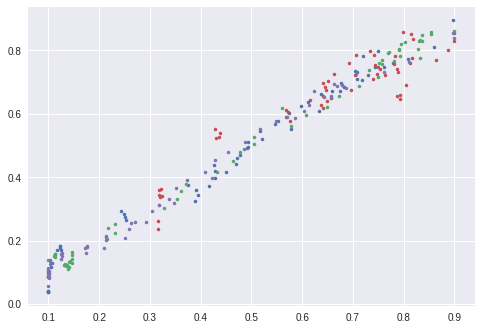

In [10]:
clf.fit(X,Y) #treinamento
W = clf.predict(X) #checagem
plt.plot(Y,W,'.')
plt.show()